# Image processing

by [Richard Tsai](https://www.researchgate.net/profile/Richard_Tsai3)

We will look at denoising of images to which noise is added.

# Denoising

In 1D: we have the noisy data $f_j$ which we assume to be "sampled" from a function $f(x)$  on a uniform grid.
**$f$ may have discontinuities.**
We want to compute a grid function (i.e. a vector), $u$, which approximate $f$ well.

We assume that $u$ and $f$ are periodic.

The following is a basic form of the Rudin-Osher-Fatemi denoising model:

$$ \min_{u\in \mathbb{R}^d} E_{ROF}(u_1,u_2,\cdots,u_{N}), $$
with periodic boundary conditions: $u_1=u_{N+1}$ and $f_1=f_{N+1}$.


$$ E_{ROF}(u_1,u_2,\cdots,u_{N}):=\lambda\sum_{j=1}^{N} \frac{|u_{j+1}-u_j|}{h} h + \frac{1}{2}\sum_{j=1}^{N} (u_j-f_j)^2 h $$ 


The first term is called **the total variation** of $u$.


**Problem:**

1. Derive $\nabla E_{ROF}$. 
2. Write a piece of code, using the templates provided below, performing gradient descent on $E_{ROF}$ in order to find a minimum of $E_{ROF}$. The gradient descent can equation is defined as the following:

$$ U^{(n+1)}:=U^{(n)}-\Delta t\nabla E_{ROF}(U^{(k)}), $$ 

where $U^{(k)} = (u_1^{(k)},u_2^{(k)},\cdots, u_{N}^{(k)})^\top$.
3. Run the algorithm with `f=F1` and `F2` defined below, using $U^{(0)}=(f_1,f_2,\cdots,f_{N-1})^\top$, $\lambda=0.01, 0.1$ for $10,000$ iterations. Report the solutions that you get.
4. Replacing $E_{ROF}$ by $E_{Laplace}$ defined below:

$$ E_{Laplace}(u_1,u_2,\cdots,u_{N}):=\lambda\sum_{j=1}^{N} \frac{1}{2}\frac{|u_{j+1}-u_j|^2}{h^2} h + \frac{1}{2}\sum_{j=1}^{N} 
(u_j-f_j)^2 h.$$ 

Derive the equations satisfied by the critical point of $E_{Laplace}$. Solve the resultign equations by Conjugate Gradient method, with $\lambda=0.01, 0.1$. Compare the solutions to the one obtained in 3. 

The data, `F1` and `F2`, have different charcteristics. For each of teh data, what method would you recommend?

In [7]:
function ROF_gradient_descent_step!(U,Unew, f, h, Δt, λ)
  
end


function Laplace_gradient_descent_step!(U,Unew, f, h, Δt, λ)
  
end

Laplace_gradient_descent_step! (generic function with 1 method)

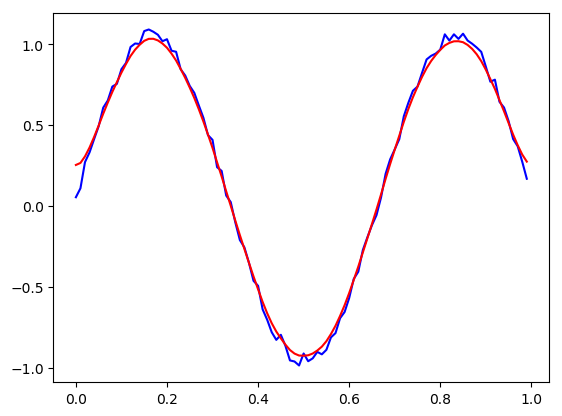

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x140e8c410>

In [16]:
using PyPlot


n=100
x=linspace(0.0,1.0-1/n,n)

F1=sin.(3π.*x)+0.1*rand(n)
F2=(convert.(Float64, abs.(x-0.35).>0.15))-(convert.(Float64, abs.(x-0.65).>0.25))+0.1*rand(n)

F=F1

plot(x, F,"b")


U=copy(F);
Unew=copy(U)

h=1/n
dt=h^2

for t=1:500000

   Laplace_gradient_descent_step!(U,Unew, F, h, dt, 0.001) 

   U.=Unew
end


plot(x, U,"r")

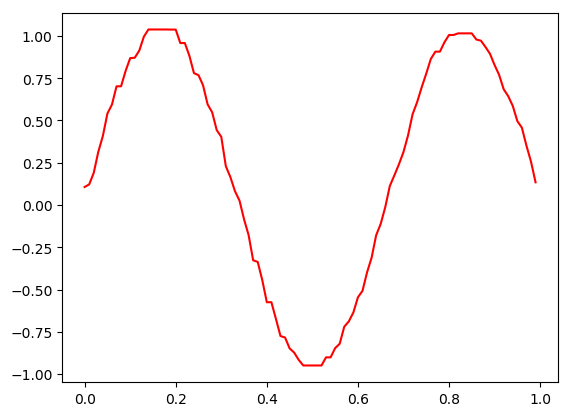

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x140d1e490>

In [12]:
U=copy(F);
Unew=copy(U)

h=1/n
dt=h^2

for t=1:500000
   ROF_gradient_descent_step!(U,Unew, F, h, dt, 0.001) 

   U.=Unew
end


plot(x, U,"r")

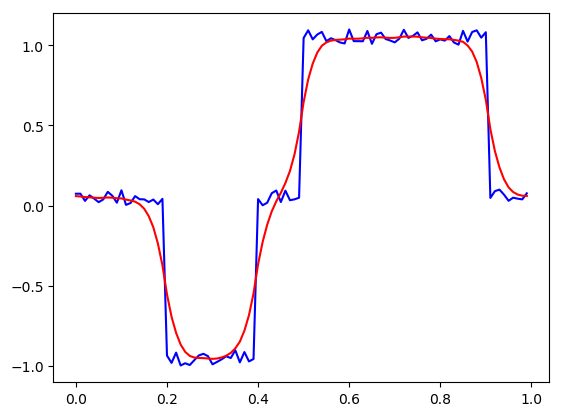

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x140ac8f90>

In [13]:
F=F2

plot(x, F,"b")


U=copy(F);
Unew=copy(U)

h=1/n
dt=h^2

for t=1:500000

   Laplace_gradient_descent_step!(U,Unew, F, h, dt, 0.001) 

   U.=Unew
end


plot(x, U,"r")

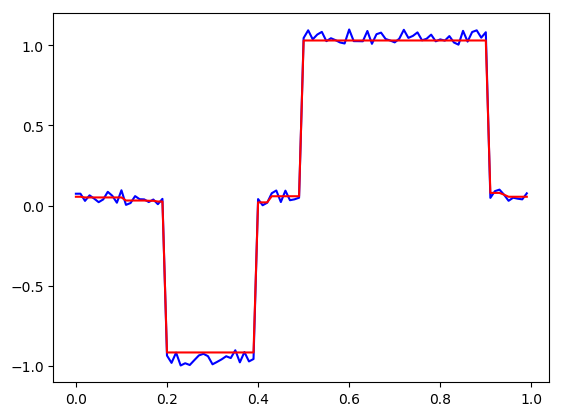

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x140fdd8d0>

In [14]:
F=F2

plot(x, F,"b")


U=copy(F);
Unew=copy(U)

h=1/n
dt=h^2

for t=1:500000
   ROF_gradient_descent_step!(U,Unew, F, h, dt, 0.01) 

   U.=Unew
end


plot(x, U,"r")

## Denoising of images

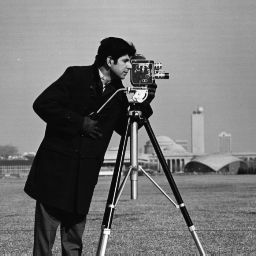

In [17]:
using Images

img=load("cameraman.png")


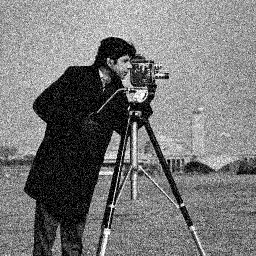

In [18]:
#convert the image to a 2D array of floating points and to add Gaussian noise to the image.
f0=convert(Array{Float64}, img)+0.1*randn(size(img));

#To view the matrix f0 as a gray scale image:
colorview(Gray, f0)


## A 2D anisotropic ROF model

$$ E_{aROF}(\{u_{i,j}\}):=  \lambda\sum_{i=1}^N\sum_{j=1}^{N} (|u_{i,j+1}-u_{i,j}|+|u_{i+1,j}-u_{i,j}|)h + \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^{N} (u_{i,j}-f_{i,j})^2 h^2 $$

$$ E_{Laplace}(\{u_{i,j}\}):=  \lambda\sum_{i=1}^N\sum_{j=1}^{N} (|u_{i,j+1}-u_{i,j}|^2+|u_{i+1,j}-u_{i,j}|^2) + \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^{N} (u_{i,j}-f_{i,j})^2 h^2 $$

Periodic boundary conditions: $u_{i,N+1}=u_{i,1}, i=1,2,\cdots,N$ and $u_{N+1,j}=u_{1,j}, j=1,2,\cdots,N$ 

**Problem:**
Download the file "cameraman.png" from the same GitHub repositor
1. Derive the gradient of the energy, $E_{aROF}$, analytically.
2. Follow the templates provided below, write a piece of code to compute gradient descent of $E_{aROF}$, and use your code to denoise the image.
3. Do the above two steps for $E_{Laplace}$.
4. For noisy images like the one we created, which model generate "better" result?

In [3]:
function aROF2D_gradient_descent_step!(U,Unew, f, h, Δt, λ)
    M,N=size(U)
    RHS=0.0
    hh=h^2
    λh=λ*h
    
    Sgn=z->z/abs(z+1e-12)
    
    for j in 1:N, i in 1:M 
        #a lazy way for dealing with periodic boudnaries
        ip1=(i<M?i+1:1)
        im1=(i>1?i-1:M)
        jp1=(j<N?j+1:1)
        jm1=(j>1?j-1:N)
        
        RHS = #fill in the right hand side
        Unew[i,j]=U[i,j]+Δt*RHS 
    end

end


function Laplace2D_gradient_descent_step!(U,Unew, f, h, Δt, λ)
    M,N=size(U)
    RHS=0.0
    hh=h^2
    
    for j in 1:N, i in 1:M 
        #a lazy way for dealing with periodic boudnaries
        ip1=(i<M?i+1:1)
        im1=(i>1?i-1:M)
        jp1=(j<N?j+1:1)
        jm1=(j>1?j-1:N)
        
        RHS = #fill in the right hand side
        Unew[i,j]=U[i,j]+Δt*RHS 
    end

end

Laplace2D_gradient_descent_step! (generic function with 1 method)

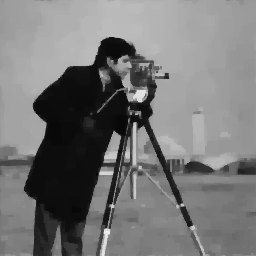

In [4]:
U=copy(f0);
Unew=copy(U)

h=1/size(U,1)
dt=0.5*h^2

for t=1:2500
   aROF2D_gradient_descent_step!(U,Unew, f0, h, dt, 0.02) 

   #Laplace2D_gradient_descent_step!(U,Unew, f0, h, dt, 0.01) 

   U.=Unew
end

colorview(Gray, U)

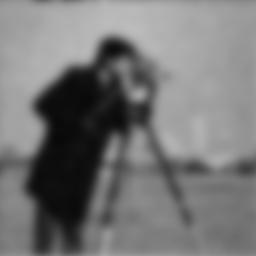

In [5]:
U=copy(f0);
Unew=copy(U)

h=1/size(U,1)
dt=0.5*h^2

for t=1:2500

   Laplace2D_gradient_descent_step!(U,Unew, f0, h, dt, 0.01) 

   U.=Unew
end

colorview(Gray, U)